In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
file_path = "C:/Users/Admin/Desktop/PROJECT WORK/DROUGHT-FORECASTING-IN-KENYA-USING-MACHINE-LEARNING/Datafiles/WORKBOOKS/FINAL/ANOMALIES.xlsx"
sheet_name = "WAJIR"  

df = pd.read_excel(file_path, sheet_name=sheet_name)

df.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,IODW,IODE,NINO3.4,NINO4
0,1979,2.254929,0.163248,0.758247,-0.441987,-0.405171,-0.563282,-0.330486,-0.605034,-0.398047,-0.684681,-0.384827,0.833953,-0.222000,-0.220667,0.306667,0.076667
1,1980,-0.432248,0.231212,-0.861209,-1.055188,0.156231,-0.563282,0.280136,1.937247,-0.151188,-0.735537,-0.009679,-0.806340,-0.519000,-0.249667,-0.103333,-0.023333
2,1981,-0.432248,-0.652313,-0.040411,-0.172280,0.245730,-0.563282,0.537241,-0.210542,-0.513249,-0.247637,-0.236069,-0.473733,-0.317667,0.163000,-0.303333,-0.260000
3,1982,-0.432248,-0.597942,0.565552,-0.829449,0.141767,-0.519153,-0.426900,-0.605034,0.753964,1.435379,0.990038,-0.630087,0.248333,-0.174333,2.036667,0.583333
4,1983,-0.432248,5.070209,-0.865309,-1.163003,-0.712541,-0.239669,3.365387,-0.473536,-0.052444,-0.557541,-0.460704,-0.004672,-0.244000,-0.296000,-1.160000,-0.910000


In [13]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

df_lag = df.copy()

for i, month in enumerate(months):
    if i == 0:
        df_lag[month + '_LAG1'] = df[months[-1]].shift(1)
    else:
        df_lag[month + '_LAG1'] = df[months[i - 1]]

for month in months:
    corr = df_lag[[month + '_LAG1', 'IODE']].corr().iloc[0, 1]
    print(f"Correlation between {month}_LAG1 and IODE: {corr:.3f}")
indices = ['IODE', 'IODW', 'NINO4', 'NINO3.4']

for index in indices:
    print(f"\nCorrelations with {index} (1-month lag):")
    for month in months:
        corr = df_lag[[month + '_LAG1', index]].corr().iloc[0, 1]
        print(f"{month}_LAG1 vs {index}: {corr:.3f}")

Correlation between JAN_LAG1 and IODE: -0.354
Correlation between FEB_LAG1 and IODE: -0.440
Correlation between MAR_LAG1 and IODE: -0.158
Correlation between APR_LAG1 and IODE: 0.124
Correlation between MAY_LAG1 and IODE: 0.162
Correlation between JUN_LAG1 and IODE: -0.040
Correlation between JUL_LAG1 and IODE: 0.241
Correlation between AUG_LAG1 and IODE: 0.032
Correlation between SEP_LAG1 and IODE: -0.037
Correlation between OCT_LAG1 and IODE: -0.126
Correlation between NOV_LAG1 and IODE: 0.008
Correlation between DEC_LAG1 and IODE: 0.264

Correlations with IODE (1-month lag):
JAN_LAG1 vs IODE: -0.354
FEB_LAG1 vs IODE: -0.440
MAR_LAG1 vs IODE: -0.158
APR_LAG1 vs IODE: 0.124
MAY_LAG1 vs IODE: 0.162
JUN_LAG1 vs IODE: -0.040
JUL_LAG1 vs IODE: 0.241
AUG_LAG1 vs IODE: 0.032
SEP_LAG1 vs IODE: -0.037
OCT_LAG1 vs IODE: -0.126
NOV_LAG1 vs IODE: 0.008
DEC_LAG1 vs IODE: 0.264

Correlations with IODW (1-month lag):
JAN_LAG1 vs IODW: -0.405
FEB_LAG1 vs IODW: -0.219
MAR_LAG1 vs IODW: -0.179
APR_LAG

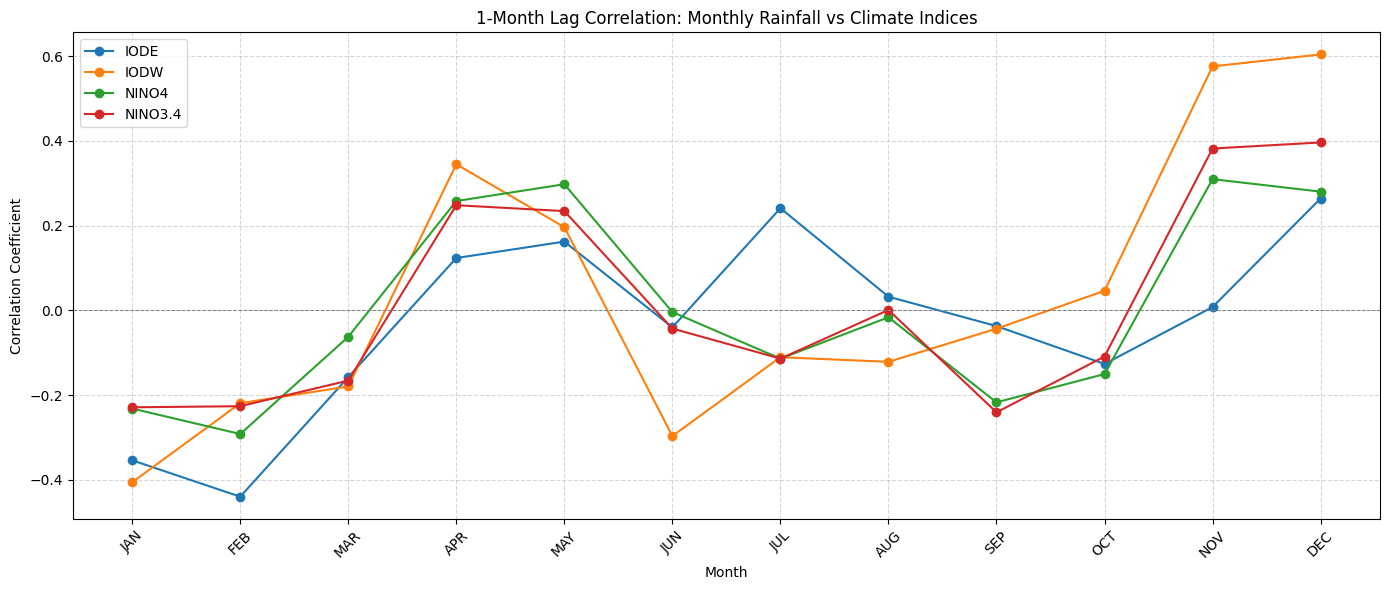

In [14]:
cor_df = pd.DataFrame(index=months, columns=indices)

for index in indices:
    for month in months:
        corr = df_lag[[month + '_LAG1', index]].corr().iloc[0, 1]
        cor_df.loc[month, index] = corr

cor_df = cor_df.astype(float)
plt.figure(figsize=(14, 6))
for index in indices:
    plt.plot(months, cor_df[index], marker='o', label=index)

plt.title('1-Month Lag Correlation: Monthly Rainfall vs Climate Indices')
plt.xlabel('Month')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [9]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

df_lag3 = df.copy()

for i, month in enumerate(months):
    if i < 3:
        df_lag3[month + '_LAG3'] = df[months[i - 3]].shift(1)
    else:
        df_lag3[month + '_LAG3'] = df[months[i - 3]]

indices = ['IODE', 'IODW', 'NINO4', 'NINO3.4']

for index in indices:
    print(f"\nCorrelations with {index} (3-month lag):")
    for month in months:
        corr = df_lag3[[month + '_LAG3', index]].corr().iloc[0, 1]
        print(f"{month}_LAG3 vs {index}: {corr:.3f}")



Correlations with IODE (3-month lag):
JAN_LAG3 vs IODE: -0.469
FEB_LAG3 vs IODE: -0.424
MAR_LAG3 vs IODE: -0.354
APR_LAG3 vs IODE: -0.440
MAY_LAG3 vs IODE: -0.158
JUN_LAG3 vs IODE: 0.124
JUL_LAG3 vs IODE: 0.162
AUG_LAG3 vs IODE: -0.040
SEP_LAG3 vs IODE: 0.241
OCT_LAG3 vs IODE: 0.032
NOV_LAG3 vs IODE: -0.037
DEC_LAG3 vs IODE: -0.126

Correlations with IODW (3-month lag):
JAN_LAG3 vs IODW: -0.283
FEB_LAG3 vs IODW: -0.072
MAR_LAG3 vs IODW: -0.405
APR_LAG3 vs IODW: -0.219
MAY_LAG3 vs IODW: -0.179
JUN_LAG3 vs IODW: 0.345
JUL_LAG3 vs IODW: 0.196
AUG_LAG3 vs IODW: -0.296
SEP_LAG3 vs IODW: -0.110
OCT_LAG3 vs IODW: -0.121
NOV_LAG3 vs IODW: -0.043
DEC_LAG3 vs IODW: 0.046

Correlations with NINO4 (3-month lag):
JAN_LAG3 vs NINO4: -0.393
FEB_LAG3 vs NINO4: -0.148
MAR_LAG3 vs NINO4: -0.232
APR_LAG3 vs NINO4: -0.292
MAY_LAG3 vs NINO4: -0.062
JUN_LAG3 vs NINO4: 0.258
JUL_LAG3 vs NINO4: 0.298
AUG_LAG3 vs NINO4: -0.004
SEP_LAG3 vs NINO4: -0.114
OCT_LAG3 vs NINO4: -0.016
NOV_LAG3 vs NINO4: -0.217
DEC_L

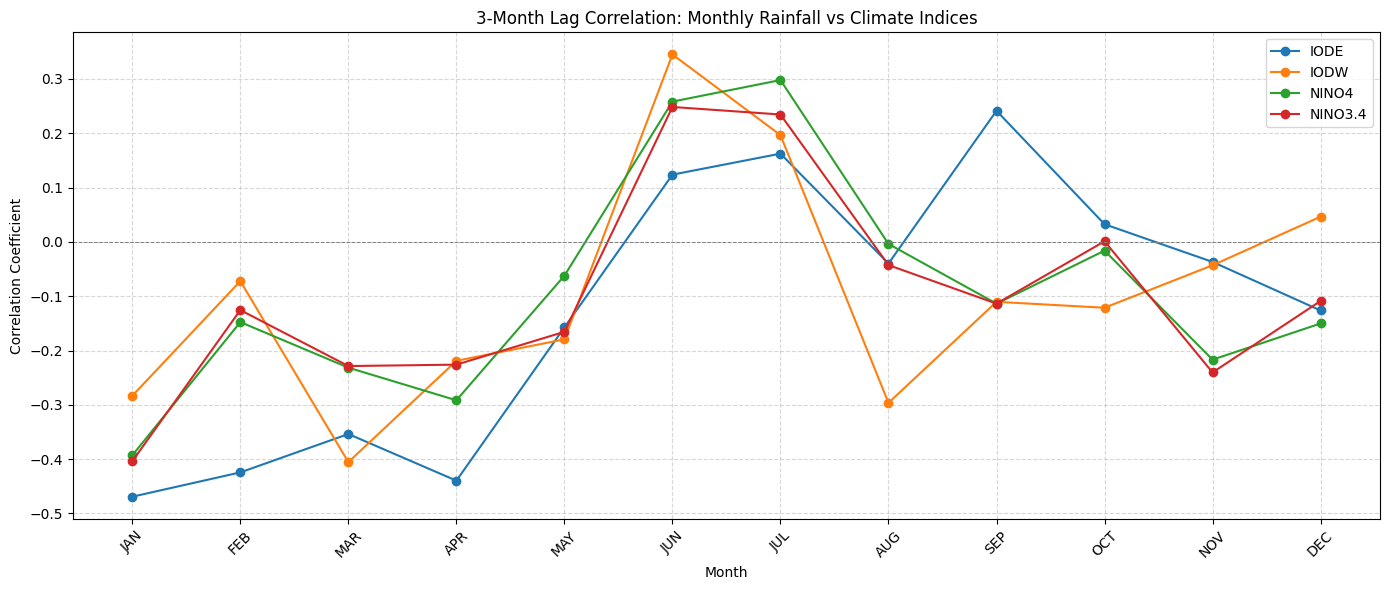

In [10]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
indices = ['IODE', 'IODW', 'NINO4', 'NINO3.4']

cor_df = pd.DataFrame(index=months, columns=indices)

for index in indices:
    for month in months:
        cor = df_lag3[[month + '_LAG3', index]].corr().iloc[0, 1]
        cor_df.loc[month, index] = cor

cor_df = cor_df.astype(float)

plt.figure(figsize=(14, 6))
for i, index in enumerate(indices):
    plt.plot(months, cor_df[index], marker='o', label=index)

plt.title('3-Month Lag Correlation: Monthly Rainfall vs Climate Indices')
plt.xlabel('Month')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [16]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

df_lag5 = df.copy()

for i, month in enumerate(months):
    if i < 5:
        df_lag5[month + '_LAG5'] = df[months[i - 5]].shift(1)
    else:
        df_lag5[month + '_LAG5'] = df[months[i - 5]]

indices = ['IODE', 'IODW', 'NINO4', 'NINO3.4']

for index in indices:
    print(f"\nCorrelations with {index} (5-month lag):")
    for month in months:
        corr = df_lag5[[month + '_LAG5', index]].corr().iloc[0, 1]
        print(f"{month}_LAG5 vs {index}: {corr:.3f}")



Correlations with IODE (5-month lag):
JAN_LAG5 vs IODE: 0.072
FEB_LAG5 vs IODE: 0.024
MAR_LAG5 vs IODE: -0.469
APR_LAG5 vs IODE: -0.424
MAY_LAG5 vs IODE: -0.354
JUN_LAG5 vs IODE: -0.440
JUL_LAG5 vs IODE: -0.158
AUG_LAG5 vs IODE: 0.124
SEP_LAG5 vs IODE: 0.162
OCT_LAG5 vs IODE: -0.040
NOV_LAG5 vs IODE: 0.241
DEC_LAG5 vs IODE: 0.032

Correlations with IODW (5-month lag):
JAN_LAG5 vs IODW: -0.335
FEB_LAG5 vs IODW: -0.147
MAR_LAG5 vs IODW: -0.283
APR_LAG5 vs IODW: -0.072
MAY_LAG5 vs IODW: -0.405
JUN_LAG5 vs IODW: -0.219
JUL_LAG5 vs IODW: -0.179
AUG_LAG5 vs IODW: 0.345
SEP_LAG5 vs IODW: 0.196
OCT_LAG5 vs IODW: -0.296
NOV_LAG5 vs IODW: -0.110
DEC_LAG5 vs IODW: -0.121

Correlations with NINO4 (5-month lag):
JAN_LAG5 vs NINO4: -0.187
FEB_LAG5 vs NINO4: -0.129
MAR_LAG5 vs NINO4: -0.393
APR_LAG5 vs NINO4: -0.148
MAY_LAG5 vs NINO4: -0.232
JUN_LAG5 vs NINO4: -0.292
JUL_LAG5 vs NINO4: -0.062
AUG_LAG5 vs NINO4: 0.258
SEP_LAG5 vs NINO4: 0.298
OCT_LAG5 vs NINO4: -0.004
NOV_LAG5 vs NINO4: -0.114
DEC_LA

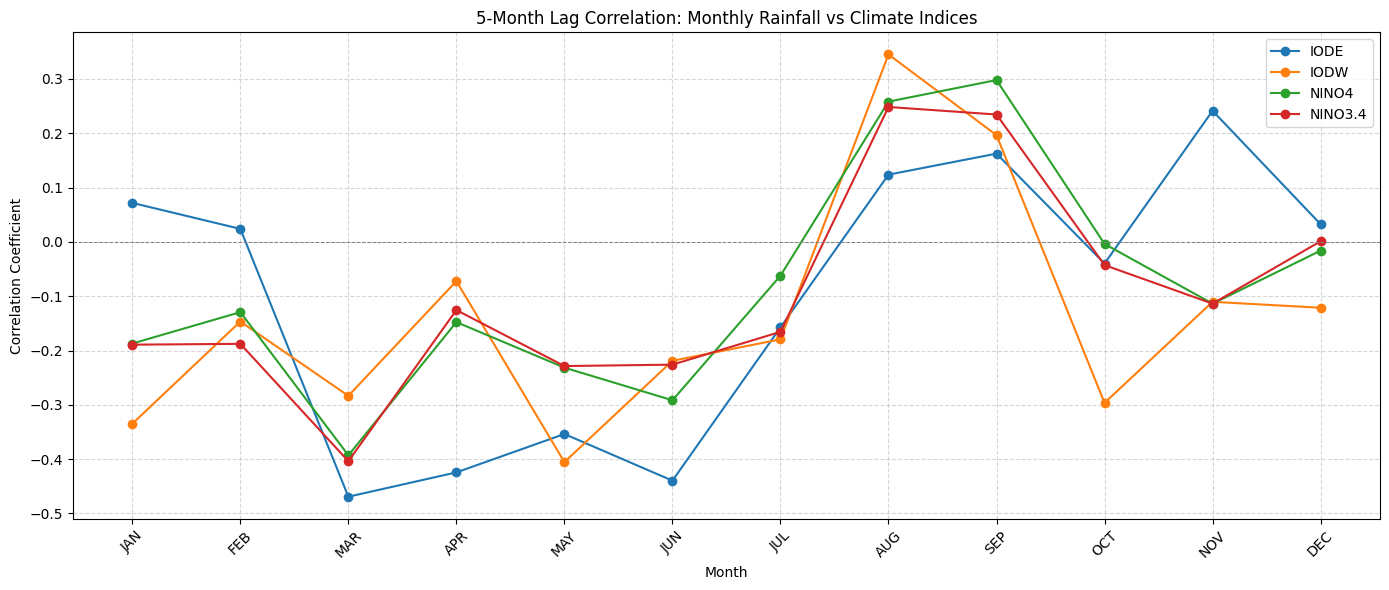

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
indices = ['IODE', 'IODW', 'NINO4', 'NINO3.4']

# Build correlation DataFrame
cor_df_5lag = pd.DataFrame(index=months, columns=indices)

for index in indices:
    for month in months:
        corr = df_lag5[[month + '_LAG5', index]].corr().iloc[0, 1]
        cor_df_5lag.loc[month, index] = corr

cor_df_5lag = cor_df_5lag.astype(float)

# Plotting
plt.figure(figsize=(14, 6))
for index in indices:
    plt.plot(months, cor_df_5lag[index], marker='o', label=index)

plt.title('5-Month Lag Correlation: Monthly Rainfall vs Climate Indices')
plt.xlabel('Month')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
